/Users/phoenix/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


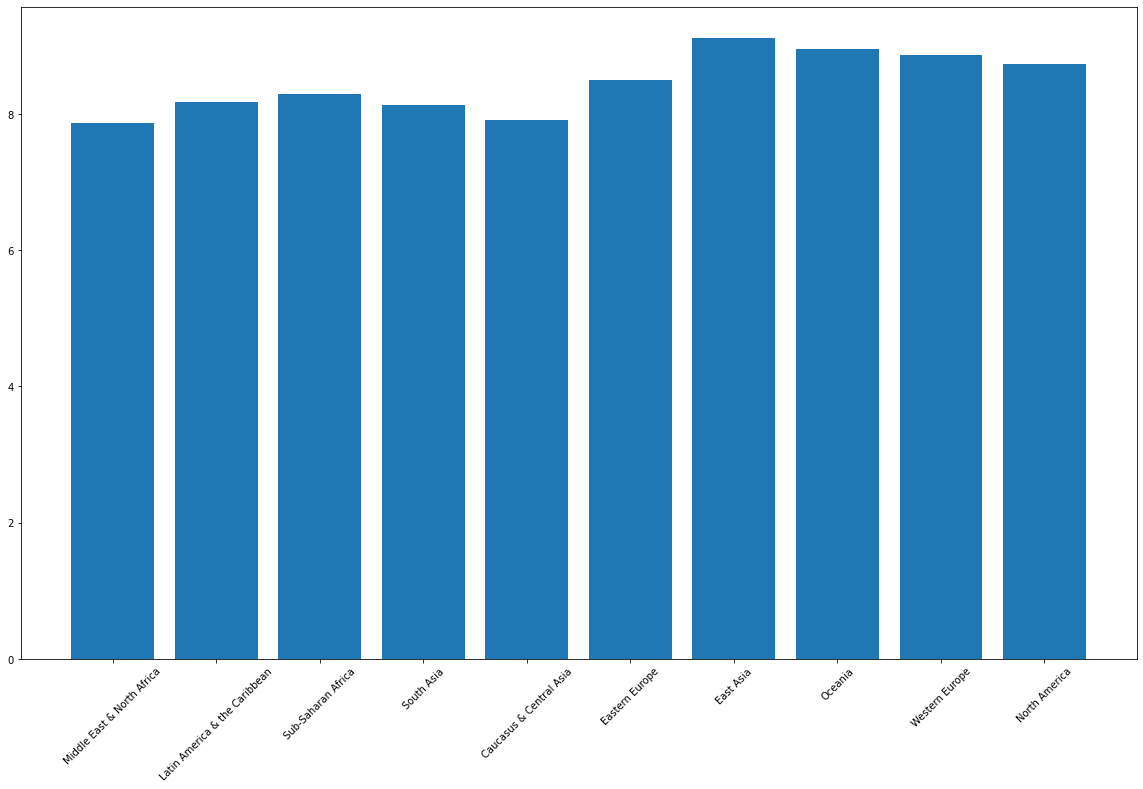

In [16]:
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

df = pd.read_csv("hfi_cc_2019.csv") 
# def text2tokens(text):
#     text = text.replace("ooo","/")#
    
# df["hf_score"] = df.hf_score.apply(text2tokens)
df_clean = df[~df.hf_score.str.contains("-")]

df_clean["hf_score"]= df_clean["hf_score"].astype(float)
df_clean
# df = df.groupby(["region"]).agg({'hf_score': 'mean'})

df_clean

df2 = pd.read_csv("sentiment_analysis_byRegion.csv") 
df2 = df2.groupby(["region"]).agg({'score': 'mean'})
# print(df2)
df2


df_clean = df_clean.sort_values(by = "hf_score")
plt.figure(figsize=(20,12))

plt.bar(df_clean["region"], df_clean["hf_score"], alpha =1)
plt.xticks(rotation=45)
plt.show()

In [3]:
new_df = pd.read_csv("sentiment_analysis_byRegion.csv")

<Figure size 720x432 with 0 Axes>

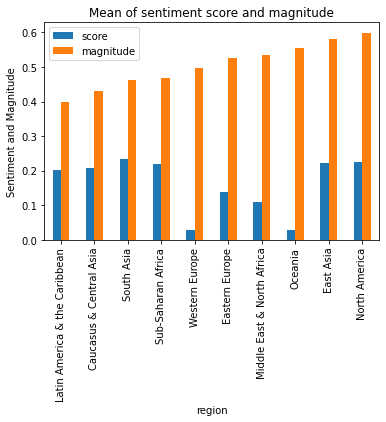

In [4]:
aggregation_functions_mean = {"region":"first","score":"mean","magnitude":"mean"}
by_region_mean = new_df.groupby(by="region").aggregate(aggregation_functions_mean)
by_region_mean = by_region_mean.sort_values(by="magnitude")

plt.figure(figsize=(10,6))
plt.tight_layout()
by_region_mean.plot.bar(x = "region",y=["score","magnitude"])
plt.title("Mean of sentiment score and magnitude")
plt.ylabel("Sentiment and Magnitude")


plt.show()

<Figure size 720x432 with 0 Axes>

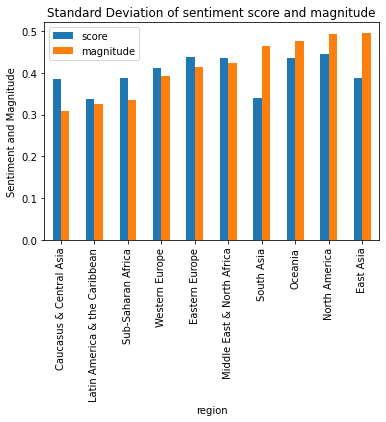

In [5]:
aggregation_functions_std = {"region":"first","score":"std","magnitude":"std"}
by_region_std = new_df.groupby(by="region").aggregate(aggregation_functions_std)
by_region_std = by_region_std.sort_values(by="magnitude")


plt.figure(figsize=(10,6))
plt.tight_layout()
by_region_std.plot.bar(x = "region",y=["score","magnitude"])
plt.title("Standard Deviation of sentiment score and magnitude")
plt.ylabel("Sentiment and Magnitude")
plt.show()

In [6]:
# Multiple Linear Regression - Analyze Step
# --------------------------------------------------------------------------------
regression_df_train = pd.DataFrame()
regression_df_test = pd.DataFrame()

train_scores = sorted(new_df["score"].sample(frac=.8))
train_magnitudes = sorted(new_df["magnitude"].sample(frac=.8))
train_hfi_score = sorted((df[df.hf_score != "-"]["hf_score"]).sample(n = len(train_scores)))

test_scores = sorted(new_df["score"].sample(frac=.2))
test_magnitudes = sorted(new_df["magnitude"].sample(frac=.2))
test_hfi_score = sorted((df[df.hf_score != "-"]["hf_score"]).sample(n = len(test_scores)))

regression_df_train["train_scores"] = train_scores
regression_df_train["train_magnitudes"] = train_magnitudes
regression_df_train["train_hfi_score"] = train_hfi_score

regression_df_test["test_scores"] = test_scores
regression_df_test["test_magnitudes"] = test_magnitudes
regression_df_test["test_hfi_score"] = test_hfi_score

X = regression_df_train[["train_scores","train_magnitudes"]]
y = regression_df_train["train_hfi_score"]

X_test = regression_df_test[["test_scores","test_magnitudes"]]# .values.reshape(1,-1)

In [7]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X,y)

regression_df_test["hfi_prediction"] = regression_model.predict(X_test)

The r-squared value determined from this regression analysis is 95.20541359526474%, indicating a strong link between     sentiment, magnitude, and the predicted Human Freedom Index Score.


/Users/phoenix/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


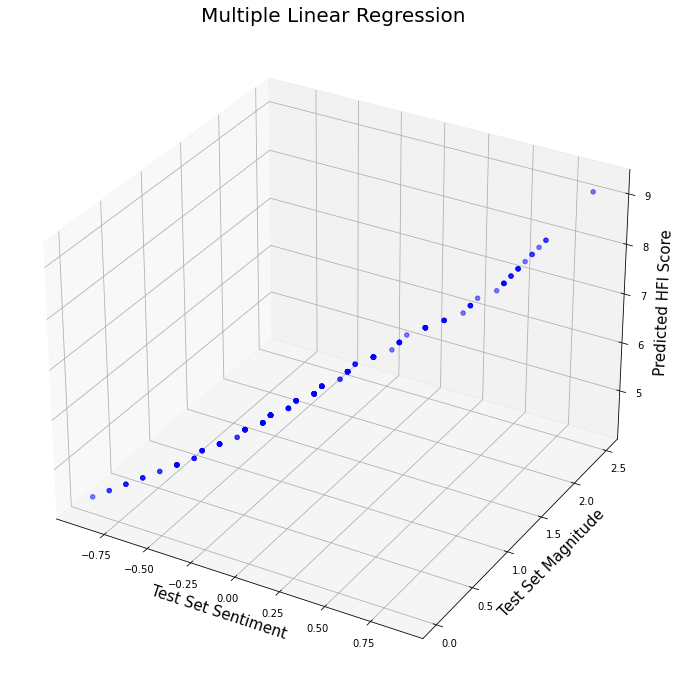

In [40]:
predictions = np.array(regression_df_test["hfi_prediction"])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(regression_df_test["test_scores"], \
           regression_df_test["test_magnitudes"],regression_df_test["hfi_prediction"], \
           marker="o",color="b",alpha=0.5)

plt.title("Multiple Linear Regression",fontsize=20)
ax.set_xlabel("Test Set Sentiment",fontsize=15)
ax.set_ylabel("Test Set Magnitude",fontsize=15)
ax.set_zlabel("Predicted HFI Score",fontsize=15)

fig.savefig("regression.png")
fig.show()

r2 = r2_score(regression_df_test.test_hfi_score, regression_df_test.hfi_prediction)
print(f"The r-squared value determined from this regression analysis is {r2 * 100}%, \
indicating a strong link between \
    sentiment, magnitude, and the predicted Human Freedom Index Score.")

In [32]:
r2_score(regression_df_test.test_hfi_score, regression_df_test.hfi_prediction)

0.9520541359526474